DATASET 03: LAPTOP PRICES

Company     Product  TypeName  Inches                   ScreenResolution CPU_Company      CPU_Type  CPU_Frequency (GHz)  RAM (GB)              Memory GPU_Company               GPU_Type OpSys  Weight (kg)  Price (Euro)
  Apple MacBook Pro Ultrabook    13.3 IPS Panel Retina Display 2560x1600       Intel       Core i5                  2.3         8           128GB SSD       Intel Iris Plus Graphics 640 macOS         1.37       1339.69
  Apple Macbook Air Ultrabook    13.3                           1440x900       Intel       Core i5                  1.8         8 128GB Flash Storage       Intel       HD Graphics 6000 macOS         1.34        898.94
     HP      250 G6  Notebook    15.6                  Full HD 1920x1080       Intel Core i5 7200U                  2.5         8           256GB SSD       Intel        HD Graphics 620 No OS         1.86        575.00
  Apple MacBook Pro Ultrabook    15.4 IPS Panel Retina Display 2880x1800       Intel       Core i7                  2.7        1

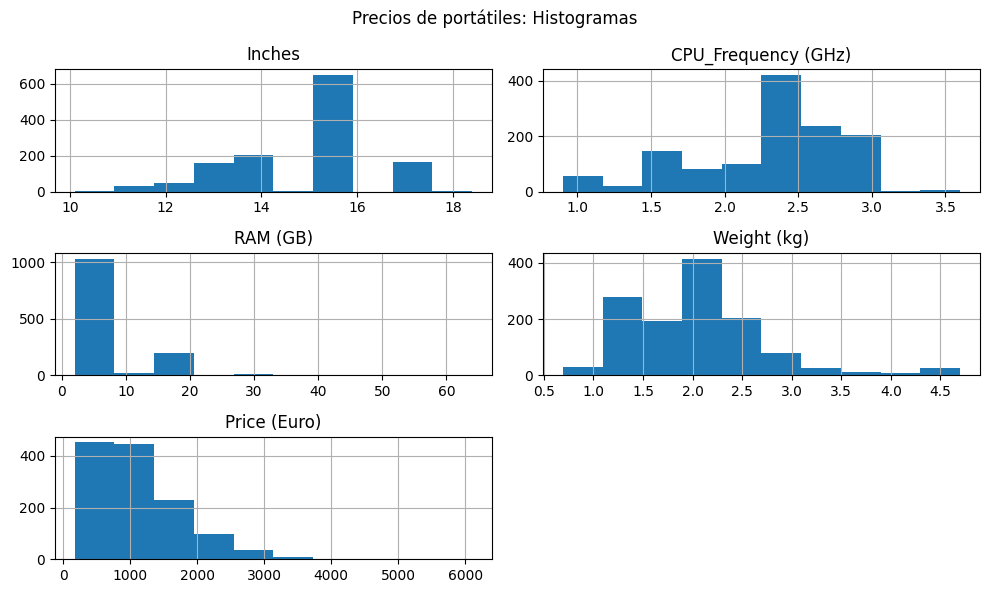

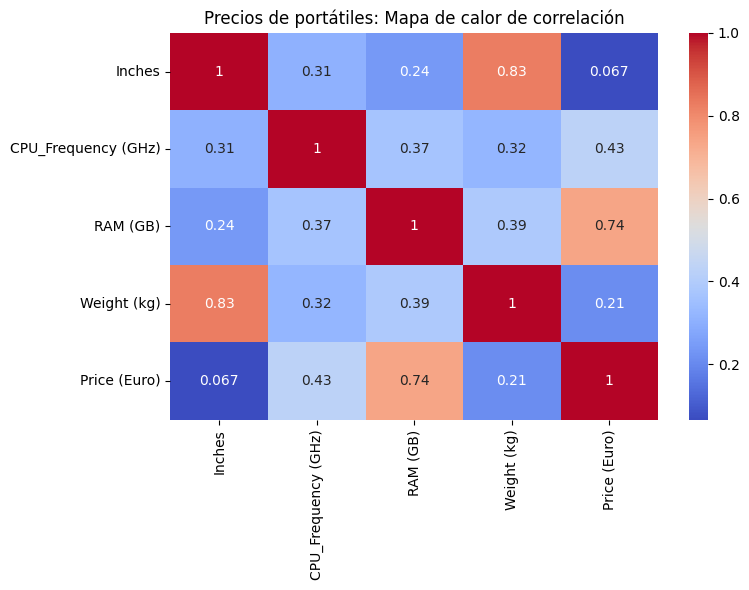


Valores faltantes:
              index  0
            Company  0
            Product  0
           TypeName  0
             Inches  0
   ScreenResolution  0
        CPU_Company  0
           CPU_Type  0
CPU_Frequency (GHz)  0
           RAM (GB)  0
             Memory  0
        GPU_Company  0
           GPU_Type  0
              OpSys  0
        Weight (kg)  0
       Price (Euro)  0

Valores atípicos:

Inches: 37 valores atípicos

CPU_Frequency (GHz): 2 valores atípicos

RAM (GB): 219 valores atípicos

Weight (kg): 45 valores atípicos

Price (Euro): 28 valores atípicos


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Cargar el conjunto de datos
df_laptops = pd.read_csv("C:/Users/ivan_/Documents/bootcamp/machine_learning/core05/laptop_price - dataset.csv")

# Mostrar las primeras 5 filas y todas las columnas
print(df_laptops.head().to_string(index=False))

# Mostrar columnas y sus tipos
print(df_laptops.info())


# Mostrar las estadísticas descriptivas de las características numéricas
print("\nEstadísticas descriptivas:")
print(df_laptops.describe().to_string())

# Analizar la distribución de las características categóricas
print("\nCaracterísticas categóricas:")
for col in df_laptops.select_dtypes(include=['object']):
    print(f"\n{col}:")
    if df_laptops[col].nunique() < 50:   # Solo imprimir si hay un número razonable de valores únicos
        print(df_laptops[col].value_counts().reset_index().to_string(index=False))
    else:
        # Obtener las 50 más frecuentes si hay demasiados valores únicos
        top_occurring_values = df_laptops[col].value_counts().head(50).index.tolist()
        print(f"Top 50 valores únicos: {top_occurring_values}")

# Crear visualizaciones para comprender la distribución de las variables
df_laptops.hist(figsize=(10, 6))
plt.suptitle(f'Precios de portátiles: Histogramas')
plt.tight_layout()
plt.show()

# Visualizar las correlaciones entre variables
plt.figure(figsize=(8, 6))

# Seleccionar solo columnas numéricas para la correlación
numeric_df = df_laptops.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title(f'Precios de portátiles: Mapa de calor de correlación')
plt.tight_layout()
plt.show()

# Detectar valores faltantes
print("\nValores faltantes:")
print(df_laptops.isnull().sum().reset_index().to_string(index=False))

# Detectar valores atípicos (usando el método IQR como ejemplo)
print("\nValores atípicos:")
for col in df_laptops.select_dtypes(include=np.number):
    q1 = df_laptops[col].quantile(0.25)
    q3 = df_laptops[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_laptops[(df_laptops[col] < lower_bound) | (df_laptops[col] > upper_bound)]
    print(f"\n{col}: {len(outliers)} valores atípicos")
    
# --- Hallazgos del EDA ---
# * El conjunto de datos contiene información sobre los precios de las computadoras portátiles,
#   incluyendo la compañía, el producto, el tipo de nombre, las pulgadas, la resolución de la
#   pantalla, la compañía de la CPU, el tipo de CPU, la frecuencia de la CPU (GHz), la RAM (GB),
#   la memoria, la compañía de la GPU, el tipo de GPU, el sistema operativo, el peso (kg)
#   y el precio (euros).
# * Hay un total de 1,275 filas y 15 columnas en el conjunto de datos.
# * No hay valores nulos en el conjunto de datos.
# * Se identificaron algunos outliers en las columnas 'Inches', 'CPU_Frequency (GHz)',
#   'RAM (GB)', 'Weight (kg)' y 'Price (Euro)'.
# * Las visualizaciones (histogramas y mapa de calor de correlación) ayudan a
#   comprender la distribución de las variables y las relaciones entre ellas.